In [ ]:
from Uncertainty import *
from uncertaintyMetric import *
from utils import *

K.clear_session()
check_tensorflow_gpu()

In [115]:
### COLUMN/WELL OPTIMIZATION
well_names = ['well {}'.format(p+1) for p in range(16)]
templist, well = np.arange(2,50,step=16), {}

for i in range(16):
    well[i] = templist+i
wells = np.array(list(well.values()))
measures = ['presWAT', 'co2sl', 'temp', 'presWAT_co2sl']
result_arr = np.zeros((16,4))

for m in range(len(measures)):
    for w in range(wells.shape[0]):
        result_arr[w,m] = Proxy(ncol_data=list(wells[w]), measure_type=m+1, nMCSamples=5000, 
                                            rom_data=Earth(), rom_obj=Earth(), verbose=True).value
        print('column {} done'.format(w))
    print('measure {} done'.format(m))
print('... DONE ...')

results = pd.DataFrame(result_arr, columns=measures)
results.to_csv('optimization_by_column.csv', index=0)

pd.read_csv('optimization_by_column.csv')

Measure Type: 1 | Data File Name: run_presWAT.his | Description: Pressure | nColData: [2, 18, 34] | HM-epsilon: 0.002

Read data from fehm traning simulations: Done!
Time Points: (61,)
Data Train: (180, 500)

Read y_train from fehm traning simulations: Done!
y_train: (500,)
Rescale y_train to [-1,1]: Done!

Read x_train from fehm traning simulations: Done!
x_train: (500, 4)
Rescale x_train to [-1,1]: Done!


c:\Users\381792\AppData\Local\anaconda3\envs\earth36\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Users\381792\AppData\Local\anaconda3\envs\earth36\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
c:\Users\381792\AppData\Local\anaconda3\envs\earth36\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine prec

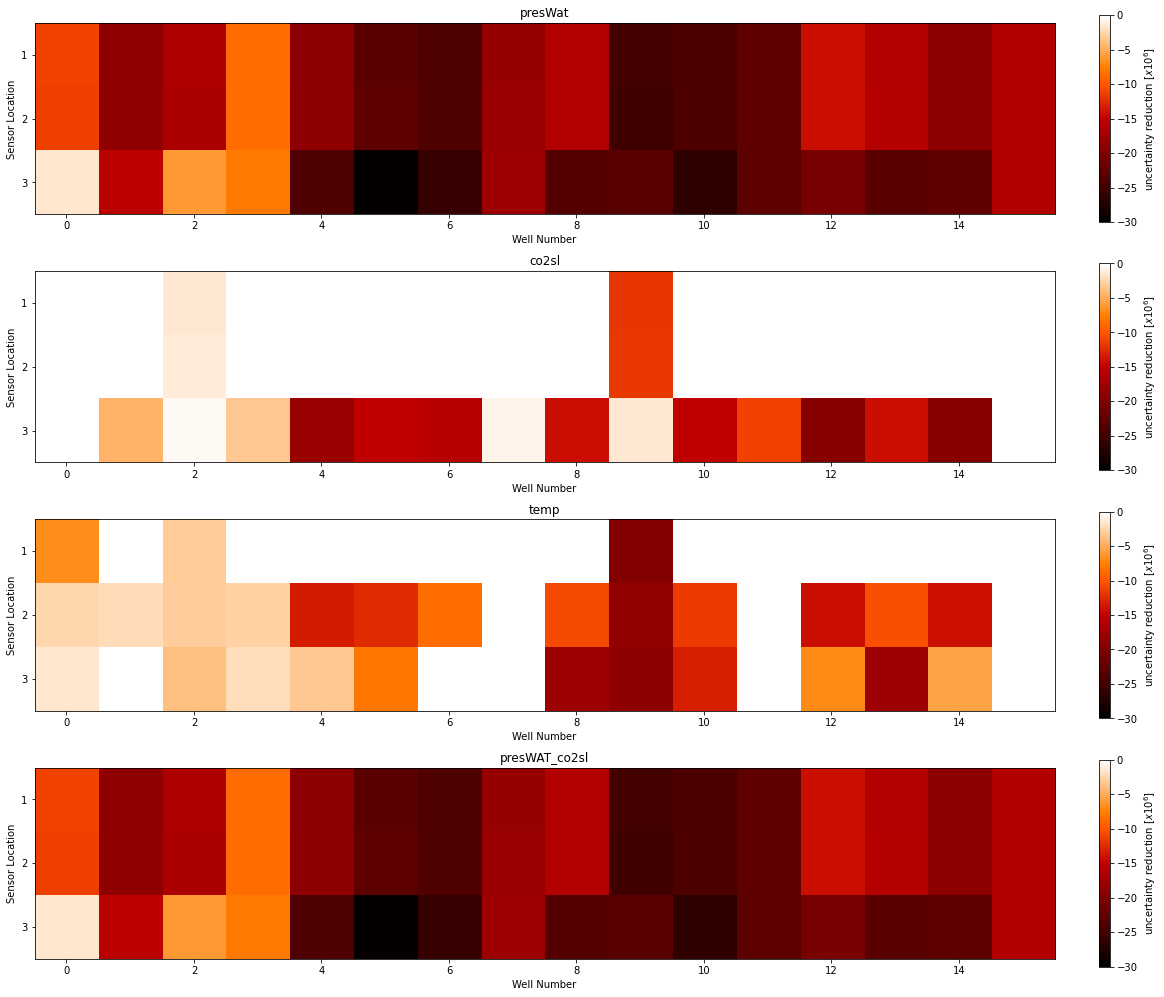

In [114]:
result_presWat = np.load('_misael_results/result_presWAT_MARS.npy').reshape(3,16)
result_co2sl   = np.load('_misael_results/result_co2sl_MARS.npy').reshape(3,16)
result_temp    = np.load('_misael_results/result_temp_MARS.npy').reshape(3,16)
result_presWAT_co2sl = np.load('_misael_results/result_presWAT_co2sl_MARS.npy').reshape(3,16)
data = [result_presWat, result_co2sl, result_temp, result_presWAT_co2sl]
titles = ['presWat','co2sl','temp','presWAT_co2sl']

plt.figure(figsize=(20,17.5))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.imshow(data[i], cmap='gist_heat', vmin=-30, vmax=0)
    plt.title(titles[i]); plt.xlabel('Well Number'); plt.ylabel('Sensor Location')
    plt.yticks(np.arange(3), labels=np.arange(1,4))
    plt.colorbar(label='uncertainty reduction [$x10^6$]', fraction=0.046, pad=0.04)
plt.show()

In [ ]:
# select       = 7
# plot_bounds  = [-3, 3]

# local_method = 'trust-krylov'
# x0           = [1.5, 1.5]
# glob_bounds  = [-2, 2]

# opt = FullOpt(select)
# local_res,  local_res_df  = opt.local_opt(x0=x0, method=local_method)
# global_res, global_res_df = opt.global_opt(varbounds=glob_bounds)
# opt.make_plot(global_res_df, local_res_df, mbounds=plot_bounds, 
#               showcontours=True, showtrajectory=True, angle=[45,225])

Brute Force

In [ ]:
view_results('LR', suptitle='Linear Regression ROM', folder='_misael_results')
view_results('MARS', suptitle='MARS ROM', folder='_misael_results')

***

In [ ]:
# General settings
Main_Directory   = os.getcwd()
Data_Directory   = os.path.join(Main_Directory, 'data')
titles           = ['.', 'Pressure', 'CO2 Saturation (l)', 'Temperature', 'Pressure + CO2 Saturation']
unc_params       = ['perm4', 'perm5', 'perm6', 'kmult']

MeasureType      = 1                           # Measurement type: 1 for pressure; 2 for CO2 saturation; 3 for tempeture, 4 for pressure+CO2 saturation                     
Total_time       = 1800                        # Total injection and post-injection time (days)
nTimeSeries      = 60                          # The number of measurement time series
nInterval        = 1                           # Measurement interval, default value = 1/Month

nTrain           = 500                         # The number of training simulations
Obj_filename     = 'run_co2mt.his'             # Objective file name
nColumn_obj      = 50                          # The column(s) in which the object of interest is located
nColumn_data     = [7]    #[7]                 # The column in which the data measurement is located 

x_max            = [1e-14, 1e-14, 1e-14, 2.0]  # Upper bounds for all the uncertain parameters
x_min            = [1e-19, 1e-19, 1e-19, 0.5]  # Lower bounds for all the uncertain parameters
ROMs_validation  = 0                           # ROMs cross-validation flag
nMCSamples       = 10000  #100000              # Number of monte carlo samples
nParam           = 4                           # Number of uncertain parameters
nDataRealization = 100    #200                 # Number of data realizations
err_option       = 3                           # Type of err option (2=MeanAE, 3=MaxAE)
time_sensitivity = 1                           # Whether consider time sensitivity for UR flag
post_processing  = 1                           # Plotting flag
print('Current Working Directory: {}'.format(Main_Directory))
print('Data Directory: {}'.format(Data_Directory))

## Step 1: Perfrom training simulation
# This step is done in a seperate code.

roms = [Ridge(), Ridge()]

***
# END